In [35]:


import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gabriel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/gabriel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
train_reviews = [
  {
    'review':'Não gostei do produto, qualidade muito baixa.',
    'sentiment': "negativa"
  },
  {
    'review':'Atendeu parcialmente às expectativas, esperava mais.',
    'sentiment': "negativa"
  },
  {
    'review':'Decepcionante, não recomendo a ninguém.',
    'sentiment': "negativa"
  },
  {
    "review": "Não recomendo, péssima qualidade e durabilidade.",
    "sentiment": "negativa"
  },
  {
    "review": "Razoável, esperava mais pelo preço que paguei.",
    "sentiment": "negativa"
  },
  
  #-----------------------------
  {
    'review':'Produto excelente, superou minhas expectativas. Recomendo a todos!',
    'sentiment': "positiva"
  },
  {
    'review':'Melhor compra que já fiz, satisfeito com o produto.',
    'sentiment': "positiva"
  },
  {
    "review": "Produto muito bom, atendeu todas as expectativas.",
    "sentiment": "positiva"
  },
  {
    "review": "Excelente serviço ao cliente, resolveram meu problema rapidamente.",
    "sentiment": "positiva"
  },
  {
    "review": "Satisfeito com a compra, entrega rápida e eficiente.",
    "sentiment": "positiva"
  },
 
  #-------------------------------------------------------
  {
    'review':'O produto é mediano, atende às expectativas',
    'sentiment': "neutra"
  },
  {
    'review':'Nada de extraordinário, mas também não é ruim',
    'sentiment': "neutra"
  },
  {
    'review':'Não tenho reclamações nem elogios sobre o produto',
    'sentiment': "neutra"
  },
  {
    'review':'Serve para o que eu preciso, sem mais nem menos',
    'sentiment': "neutra"
  },
  {
    'review':'A qualidade é aceitável, não me surpreendeu',
    'sentiment': "neutra"
  },
  
]

validation_reviews = [
  {
    'review':'Embalagem danificada, produto comprometido',
    'sentiment': "negativa"
  },
  {
    'review':'Suporte técnico incompetente, não resolveu meu problema',
    'sentiment': "negativa"
  },
  {
    'review':'Péssimo atendimento, descaso com o cliente',
    'sentiment': "negativa"
  },
  {
    'review':'Produto veio com defeito, processo de devolução complicado',
    'sentiment': "negativa"
  },
  {
    'review':'O produto veio quebrado e rachado, entrega muito ruim',
    'sentiment': "negativa"
  },
  {
    "review": "Não durou nem uma semana, péssimo investimento.",
    "sentiment": "negativa"
  },
  {
    "review": "Decepcionado, não vale o dinheiro gasto.",
    "sentiment": "negativa"
  },
  {
    "review": "Produto quebrado na entrega, experiência terrível.",
    "sentiment": "negativa"
  },
  {
    "review": "Atendimento ao cliente deixou a desejar, demora nas respostas.",
    "sentiment": "negativa"
  },
  {
    "review": "Péssima qualidade, não recomendaria a ninguém.",
    "sentiment": "negativa"
  },
  {
    "review": "Não vale o preço cobrado, arrependido da compra.",
    "sentiment": "negativa"
  },
  {
    'review': 'Não compraria novamente, péssima qualidade do produto',
    'sentiment': "negativa"
  },
  {
    'review':'Não recomendo, experiência péssima com o suporte',
    'sentiment': "negativa"
  },
  {
    'review':'Produto chegou danificado, insatisfeito com a entrega',
    'sentiment': "negativa"
  },
  {
    'review':'Atendimento lento e ineficiente, não voltaria a comprar',
    'sentiment': "negativa"
  },
  #-------------------------------------------------------
  {
    'review':'Ótimo atendimento, equipe muito prestativa',
    'sentiment': "positiva"
  },
  {
    'review':'Equipe de suporte eficiente, resolveu meu problema rapidamente',
    'sentiment': "positiva"
  },
  {
    'review':'Ótimo atendimento, equipe muito prestativa',
    'sentiment': "positiva"
  },
  {
    'review':'Tive um pós compra com bastante apoio da loja, parabéns',
    'sentiment': "positiva"
  },
  {
    'review':'atendimento excelente, a moça do balcão tinha um voz doce',
    'sentiment': "positiva"
  },
   {
    "review": "Recomendo a todos, produto de alta qualidade.",
    "sentiment": "positiva"
  },
  {
    "review": "Bom custo-benefício, atendeu minhas necessidades.",
    "sentiment": "positiva"
  },
  {
    "review": "Entrega antes do prazo, muito satisfeito.",
    "sentiment": "positiva"
  },
  {
    "review": "Produto conforme anunciado, experiência de compra satisfatória.",
    "sentiment": "positiva"
  },
  {
    'review':'Compraria novamente, excelente serviço ao cliente',
    'sentiment': "positiva"
  },
  {
    'review':'Produto de alta qualidade, superou minhas expectativas',
    'sentiment': "positiva"
  },
  {
    'review':'Boa experiência de compra, entrega dentro do prazo',
    'sentiment': "positiva"
  },
  {
    'review':'Compra fácil e rápida, satisfeito com o processo',
    'sentiment': "positiva"
  },
  {
    'review':'Suporte ágil e amigável, solucionou meu problema',
    'sentiment': "positiva"
  },
  {
    'review':'Ótima experiência de compra, entrega rápida e produto de qualidade',
    'sentiment': "positiva"
  },
  #-------------------------------------------------------
  {
    'review':'Não sei dizer se recomendaria ou não',
    'sentiment': "neutra"
  },
  {
    'review':'Está dentro das minhas expectativas, nada mais',
    'sentiment': "neutra"
  },
  {
    'review':'Não tenho muito a comentar sobre o produto',
    'sentiment': "neutra"
  },
  {
    'review':'Não é incrível, mas também não é terrível',
    'sentiment': "neutra"
  },
  {
    'review':'Faz o trabalho, sem grandes elogios',
    'sentiment': "neutra"
  },
  {
    'review':'Até agora, não tenho nada a destacar sobre o produto',
    'sentiment': "neutra"
  },
  {
    'review':'É ok, mas não sei se compraria novamente',
    'sentiment': "neutra"
  },
  {
    'review':'Não é excelente, mas também não é péssimo',
    'sentiment': "neutra"
  },
  {
    'review':'Cumpre o que promete, sem grandes destaques',
    'sentiment': "neutra"
  },
  {
    'review':'Não tenho opinião forte sobre o produto',
    'sentiment': "neutra"
  },
  {
    'review':'Estou neutro em relação a essa compra',
    'sentiment': "neutra"
  },
  {
    'review':'Parece ser razoável, sem grandes surpresas',
    'sentiment': "neutra"
  },
  {
    'review':'Estou neutro em relação a essa experiência de compra',
    'sentiment': "neutra"
  },
  {
    'review':'É satisfatório, mas não excepcional',
    'sentiment': "neutra"
  },
  {
    'review':'Não é algo que eu destacaria, mas serve',
    'sentiment': "neutra"
  },
]

# separação das revisões e sentimentos
reviews_text = [entry['review'] for entry in train_reviews]
labels = [entry['sentiment'] for entry in train_reviews]

In [37]:
# Função para pré-processamento
def preprocess(text):
  # Tokenização simples
  tokens = nltk.word_tokenize(text.lower())
  
  # Remoção de stopwords
  stop_words = set(stopwords.words('portuguese'))
  stop_words.remove('não')
  tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
  
  return ' '.join(tokens)

# Pré-processamento
reviews_text = [preprocess(review) for review in reviews_text]

In [38]:
X_train, X_validation, y_train, y_validation = train_test_split(reviews_text, labels, test_size=0.75, random_state=42)

In [39]:
# modelo BOW com TF-IDF
tfidf_vectorizer = TfidfVectorizer()  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_validation_tfidf = tfidf_vectorizer.transform(X_validation)

# Treinamento do classificador MLP para BOW
mlp_bow = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_bow.fit(X_train_tfidf, y_train)

# previsões para o modelo BOW
predictions_bow = mlp_bow.predict(X_validation_tfidf)

# acuracia do modelo BOW
accuracy_bow = accuracy_score(y_validation, predictions_bow)

# Probabilidades médias relacionadas aos acertos
average_proba_bow = np.mean([max(prob) for prob in mlp_bow.predict_proba(X_validation_tfidf)])

print(predictions_bow)

['positiva' 'negativa' 'negativa' 'positiva' 'negativa' 'positiva'
 'negativa' 'positiva' 'negativa' 'positiva' 'positiva' 'positiva']


In [40]:
# modelo Word2Vec
word2vec_model = Word2Vec(sentences=[review.split() for review in X_train], vector_size=50, window=2, min_count=1, workers=1)

# vetores médios para revisões de treinamento
X_train_w2v = [np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(word2vec_model.vector_size)], axis=0) for words in [review.split() for review in X_train]]

# vetores médios para revisões de validação
X_validation_w2v = [np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(word2vec_model.vector_size)], axis=0) for words in [review.split() for review in X_validation]]

# Treinamento do classificador MLP para Word2Vec
mlp_w2v = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_w2v.fit(X_train_w2v, y_train)

# previsões para o modelo Word2Vec
predictions_w2v = mlp_w2v.predict(X_validation_w2v)

# desempenho do modelo Word2Vec
accuracy_w2v = accuracy_score(y_validation, predictions_w2v)

# Probabilidades médias relacionadas aos acertos
average_proba_w2v = np.mean([max(prob) for prob in mlp_w2v.predict_proba(X_validation_w2v)])

print(predictions_w2v)

['positiva' 'negativa' 'negativa' 'negativa' 'neutra' 'negativa'
 'negativa' 'negativa' 'negativa' 'negativa' 'neutra' 'neutra']


In [41]:
# Crie uma tabela comparativa
comparison_table = pd.DataFrame({
    'Modelo': ['Bag of Words', 'Word2Vec'],
    '%Acerto': [accuracy_bow, accuracy_w2v],
    'Probabilidade Média de Acerto': [average_proba_bow, average_proba_w2v]
})

print(comparison_table)

         Modelo   %Acerto  Probabilidade Média de Acerto
0  Bag of Words  0.416667                       0.580200
1      Word2Vec  0.500000                       0.678926


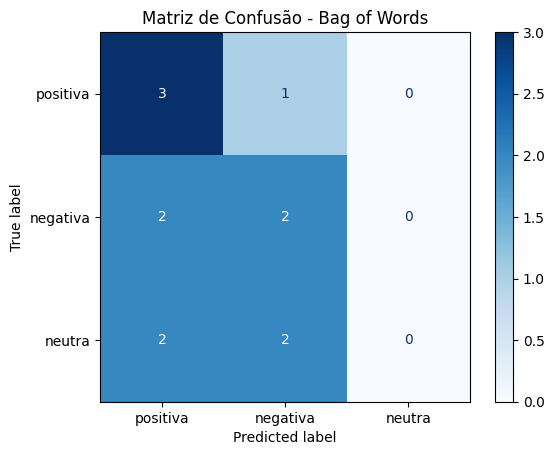

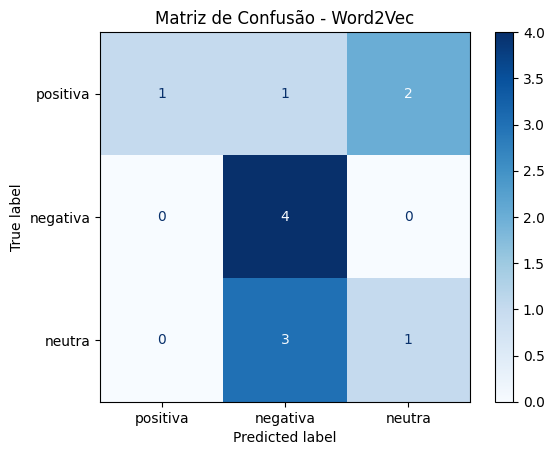

In [42]:
# Crie a matriz de confusão para BOW
cm_bow = confusion_matrix(y_validation, predictions_bow, labels=["positiva", "negativa", "neutra"])
disp_bow = ConfusionMatrixDisplay(confusion_matrix=cm_bow, display_labels=["positiva", "negativa", "neutra"])
disp_bow.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusão - Bag of Words")
plt.show()

# Crie a matriz de confusão para Word2Vec
cm_w2v = confusion_matrix(y_validation, predictions_w2v, labels=["positiva", "negativa", "neutra"])
disp_w2v = ConfusionMatrixDisplay(confusion_matrix=cm_w2v, display_labels=["positiva", "negativa", "neutra"])
disp_w2v.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusão - Word2Vec")
plt.show()

In [43]:
word2vec_model.save('model_word2vec.model')